<a href="https://colab.research.google.com/github/acesaran/MAT-421/blob/main/Module_H_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24.4 - Numerical Error and Instability

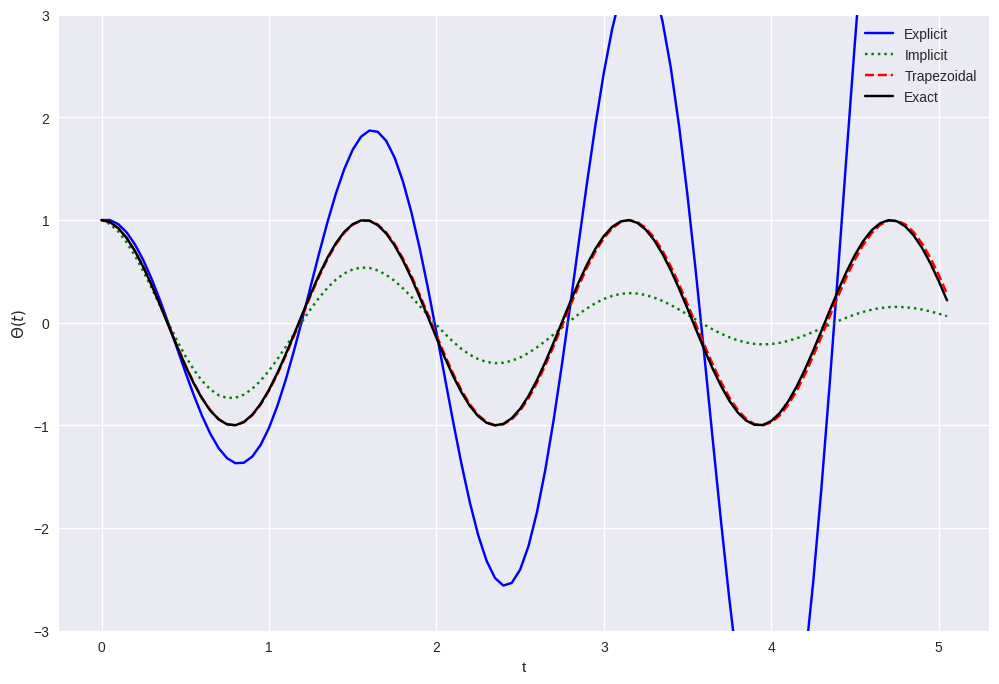

In [4]:
 #This example uses the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation with a step of .05 

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

%matplotlib inline 

h = 0.05
t = np.arange(0, 5.1, h)
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

# 22.5 - Predictor Corrector Methods

The Predictor-Corrector method of solving a differential equation uses initial conditions to improve the accuracy of the solution. The predictor estimates the solution for some Tj+1. After doing this and finding S(Tj+1), we apply the corrector to improve the accuracy. This provides us a more specific, accurate solution. 

# 22.6 - Python ODE Solvers

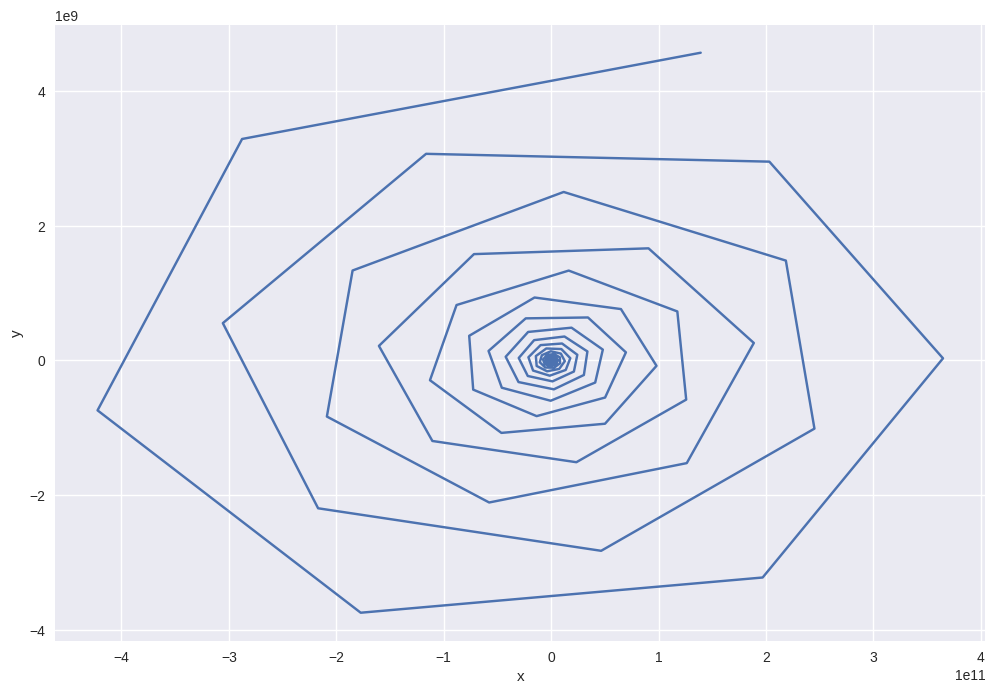

In [11]:
#We can use the solve_ivp function in python in order to solve varying types of differential equations.

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

F = lambda t, s: np.dot(np.array([[0, t**4], [-1, t]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()